In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cifar10 = pd.read_csv("cifar10.csv")
cifar100 = pd.read_csv("cifar100.csv")
cifar10.columns

Index(['D', 'M', 'N', '__pyience_timestamp__', 'acc_amm', 'acc_orig',
       'activation', 'corr', 'cossim', 'lut_work_const', 'method', 'muls',
       'ncodebooks', 'nlookups', 'nonzeros_heuristic', 'normalized_mse',
       'objective', 'problem', 'raw_mse', 'secs', 'task_id', 'trial', 'y_mean',
       'y_std', 'yhat_mean', 'yhat_std'],
      dtype='object')

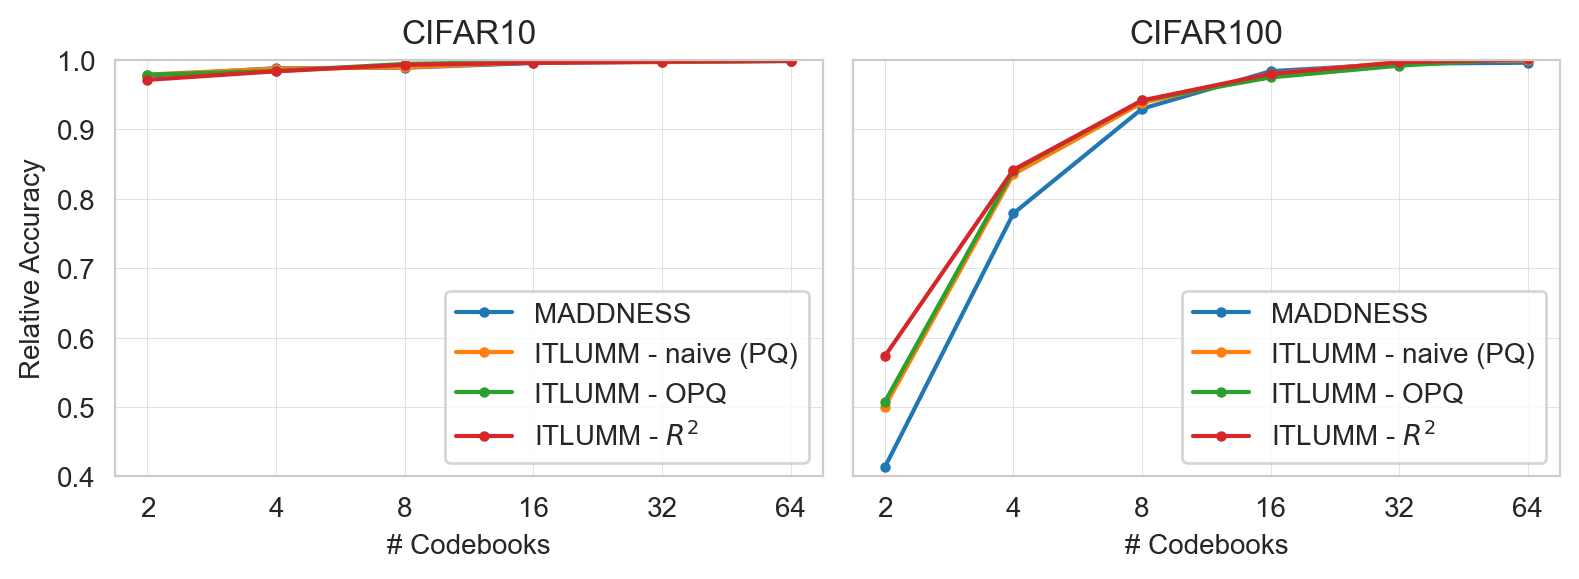

In [16]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 3), dpi=200, sharey=True);

for dset,ix,title in [(cifar10, 0, 'CIFAR10'), (cifar100, 1, 'CIFAR100')]:
    cifarPlot = dset.copy()
    exact_acc = cifarPlot[cifarPlot.method == "Exact"]["acc_amm"].item()
    cifarPlot = cifarPlot[~(cifarPlot["objective"].isin(["mse", "mse-sklearn"]))]
    cifarPlot = cifarPlot[~(cifarPlot["method"].isin(["Exact"]))]
    cifarPlot.loc[cifarPlot.method == "Mithral","nonzeros_heuristic"] = "MADDNESS"

    cifarPlot["acc_amm_pct"] = cifarPlot["acc_amm"] / exact_acc
    g = sns.lineplot(
        data=cifarPlot, x='ncodebooks', y='acc_amm_pct',
        hue='nonzeros_heuristic', marker='.', markeredgecolor=None,
        hue_order=["MADDNESS", "pq", "opq", "r2"], 
        ax=axes[ix])
    g.set(xscale='log')
    g.set_xticks([], minor=True)
    g.set_ylim(0.4, 1.0)
    g.set_yticks(np.linspace(0.4, 1.0, 61), minor=True)
    g.set(
        xticks=cifar100['ncodebooks'].dropna().unique().astype(int),
        xticklabels=cifar100['ncodebooks'].dropna().unique().astype(int));
    g.set(title=title, ylabel="Relative Accuracy", xlabel="# Codebooks");
    g.legend(["MADDNESS", "ITLUMM - naive (PQ)", "ITLUMM - OPQ", "ITLUMM - $R^2$",],loc='lower right')
    g.grid(linewidth=0.2);
plt.tight_layout()
plt.savefig("cifar-partitioning-heuristic.pdf")